In [ ]:
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace

In [ ]:
# How to read Image and Show Image
image = cv2.imread('angry.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

## Haarcascade File Detection

In [ ]:
# Loading Face Cascade file from directory
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

In [ ]:
# Reading Image
image = cv2.imread('angry.jpg')

# Convert Image to RGB
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

# Convert gray scale image for face detection
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Face detection using cascade file
faces = face_cascade.detectMultiScale(gray,2.5,4)

# Draw rectangle around the faces
for (x,y,w,h) in faces:
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)

plt.imshow(image)



In [ ]:
# Adding a text on it
font = cv2.FONT_HERSHEY_PLAIN
image_copy = image.copy()

cv2.putText(image_copy,
            'Text',
           (x,y),font,2,(0,255,255),2,cv2.LINE_4)

plt.imshow(image_copy)

## Real time video using OpenCV

In [ ]:
# Capture Video from Cam
cap = cv2.VideoCapture(0)

# Running loop to render frame
while True:
    rat, frame = cap.read()
    
    cv2.imshow('Frame',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
    
    
cap.release()    
cv2.destroyAllWindows()

## Face Emotion Recognition Using DeepFace

Action: emotion: 100%|███████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.21it/s]


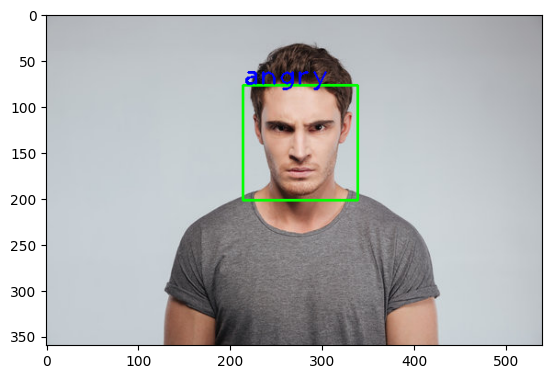

In [2]:
# Import Lib
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace

# Reading Image
image = cv2.imread('angry.jpg')

# Convert Image to RGB
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

# Convert gray scale image for face detection
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Loading Face Cascade file from directory
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

# Detecting faces in image
faces = face_cascade.detectMultiScale(gray,1.1,4)
  
# Draw Ractangle Box around faces
for (x,y,w,h) in faces:
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)

# Prediction of Emotion using DeepFace        
prediction = DeepFace.analyze(image,actions=['emotion'],enforce_detection=False)
    
# Put Text in the image
font = cv2.FONT_HERSHEY_PLAIN
cv2.putText(image,prediction[0]['dominant_emotion'],(x,y),font,2,(0,0,255),2,cv2.LINE_4)

# Showing image
plt.imshow(image)

## Real time Face Emotion Recognition

In [ ]:
import cv2  #import cv2
from deepface import DeepFace #importing Deepface model

# Loading Cascade file from the directory
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

# Acessing WebCam
cap = cv2.VideoCapture(0)

while True:
    # Reading Frame
    rat, frame = cap.read()
    
    # Flip the image horizontically 
    
    # Converting RGB image to Gray Scale image
    gray = cv2.cvtColor(frame,cv2.COLOR_RGB2GRAY)
    
    # Detecting faces in image
    faces = face_cascade.detectMultiScale(gray,1.1,4)
  
    # Draw Ractangle Box around faces
    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
        
        # Image of each face (Region of Interest)
        ROI = frame[y:y+h,x:x+w]
        
        # Prediction of Emotion using DeepFace
        prediction = DeepFace.analyze(ROI,actions=['emotion'],enforce_detection=False)
    
        # Put Text in the image
        font = cv2.FONT_HERSHEY_PLAIN
        cv2.putText(frame,prediction[0]['dominant_emotion'],(x,y),font,2,(0,0,255),2,cv2.LINE_4)
    
    # Show image in window
    cv2.imshow("Frame",frame)
    
    # If q is press, It will close the window 
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()